<a href="https://colab.research.google.com/github/noragriffith/WBtest/blob/main/test_code_noragriffith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

In [46]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Read data from Github repository
url = 'https://raw.githubusercontent.com/noragriffith/WorldBankTest/main/Test_Names.csv'
comm_trans_df = pd.read_csv(url)
comm_trans_df


,domestic,transaction_id
0,"A Class Trading Pvt., Ltd.",1
1,"A K Y Lanka Pvt., Ltd.",2
2,"A R Freight Care Services Pvt., Ltd.",3
3,"Ace International Express Pvt., Ltd.",4
4,Aero Dynamics (Pvt) Ltd.,5
...,...,...
106521,Usui Lanka (Pvt) Ltd.,106522
106522,"Variosystems Pvt., Ltd.",106523
106523,Wayamba Natural Peat,106524
106524,Wichy Plantation Co. (Pvt) Ltd.,106525


In [48]:
comm_trans_df.groupby('domestic').count()

,transaction_id
domestic,
(Camso Loadstar ( Pivt ) Ltd.),653
/Meerasahibo & Sons,5
1 Billabong Place Burleigh,1
1/138 Colonial Drive,1
1/F Block A Emerald Gardens,1
...,...
"Zpmc Lanka Co. Pvt., Ltd.",4
Zubair Gems,31
Zubair Makeen Sons,4


In [49]:
# Check dataframe information
comm_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106526 entries, 0 to 106525
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   domestic        105890 non-null  object
 1   transaction_id  106526 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [50]:
# Rename 'domestic' column name with a more meaningful name 'firm_name'
comm_trans_df.rename(columns={'domestic': 'firm_name'}, inplace=True)
comm_trans_df

,firm_name,transaction_id
0,"A Class Trading Pvt., Ltd.",1
1,"A K Y Lanka Pvt., Ltd.",2
2,"A R Freight Care Services Pvt., Ltd.",3
3,"Ace International Express Pvt., Ltd.",4
4,Aero Dynamics (Pvt) Ltd.,5
...,...,...
106521,Usui Lanka (Pvt) Ltd.,106522
106522,"Variosystems Pvt., Ltd.",106523
106523,Wayamba Natural Peat,106524
106524,Wichy Plantation Co. (Pvt) Ltd.,106525


# Analyzing null cases
- **firm_name** is not available for 0.6% of the records. Upon analysis, I decided to remove those records as it did not give any significant insight to the data.

In [51]:
# Checking null cases
comm_trans_df.isnull().sum()/len(comm_trans_df)*100

firm_name         0.597037
transaction_id    0.000000
dtype: float64

In [52]:
# Records with missing firm_name values
comm_trans_df_null = comm_trans_df[comm_trans_df['firm_name'].isnull()==True]
comm_trans_df_null

,firm_name,transaction_id
294,NaN,295
3217,NaN,3218
8785,NaN,8786
9819,NaN,9820
10036,NaN,10037
...,...,...
104321,NaN,104322
105100,NaN,105101
105462,NaN,105463
105463,NaN,105464


In [53]:
# Records with missing firm_name dropped from the dataframe
#comm_trans_df_null.to_csv('comm_trans_df_null.csv')
#comm_trans_df_null.to_csv("https://github.com/noragriffith/WBtest/comm_trans_df_null.csv")

In [54]:
# Cleaning records with null values
comm_trans_df = comm_trans_df.dropna()
comm_trans_df.isnull().sum()

firm_name         0
transaction_id    0
dtype: int64

# Data normalization
- **firm_name** ..............

In [55]:
# Performs data normalization on a series
def clean_companies(series):
  return series.str.lower().str.replace(r"[^a-z0-9\s]", '').str.replace(r"\b(plc|pivt|pvt|ltd|lt|co|sa)\b",'').str.strip()


In [56]:
clean_companies(comm_trans_df['firm_name'])

0                   a class trading
1                       a k y lanka
2         a r freight care services
3         ace international express
4                     aero dynamics
                    ...            
106521                   usui lanka
106522                 variosystems
106523         wayamba natural peat
106524             wichy plantation
106525               workwear lanka
Name: firm_name, Length: 105890, dtype: object

In [57]:
# Performs data normalization on firm_name column and add a new column with those clean names
comm_trans_df['firm_name_clean']=clean_companies(comm_trans_df['firm_name'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
comm_trans_df

,firm_name,transaction_id,firm_name_clean
0,"A Class Trading Pvt., Ltd.",1,a class trading
1,"A K Y Lanka Pvt., Ltd.",2,a k y lanka
2,"A R Freight Care Services Pvt., Ltd.",3,a r freight care services
3,"Ace International Express Pvt., Ltd.",4,ace international express
4,Aero Dynamics (Pvt) Ltd.,5,aero dynamics
...,...,...,...
106521,Usui Lanka (Pvt) Ltd.,106522,usui lanka
106522,"Variosystems Pvt., Ltd.",106523,variosystems
106523,Wayamba Natural Peat,106524,wayamba natural peat
106524,Wichy Plantation Co. (Pvt) Ltd.,106525,wichy plantation


In [59]:
grouped_comm_trans_df = comm_trans_df.groupby('firm_name_clean').count()
print(grouped_comm_trans_df)

                            firm_name  transaction_id
firm_name_clean                                      
                                    3               3
1 billabong place burleigh          1               1
1138 colonial drive                 1               1
18398 calzedonia shanghai           1               1
1f block a emerald gardens          1               1
...                               ...             ...
zpmc lanka                          4               4
zubair gems                        31              31
zubair makeen sons                  4               4
zumbach electronic ag               1               1
zumoonz gems                        1               1

[14234 rows x 2 columns]


In [60]:
# create a list of unique names
names = comm_trans_df['firm_name_clean'].unique().tolist()
names

['a class trading',
 'a k y lanka',
 'a r freight care services',
 'ace international express',
 'aero dynamics',
 'akbar bros',
 'aldora exporters',
 'alpex marine',
 'amagi exp',
 'ansell lanka',
 'antron express',
 'ap lanka',
 'aqua packaging',
 'aramex lanka',
 'arrow sea food',
 'associated speciality rubbers',
 'atheeb exp',
 'beyond exp',
 'bio grow lanka',
 'borneo exotics',
 'brandix apparel',
 'britannia garment packaging p l',
 'c w mackie',
 'c r exp',
 'capitol overseas',
 'central rubber',
 'ceylon fresh seafood',
 'ceylon natural exp',
 'ceylon paper pottery',
 'ceylon pest control',
 'ceylon tea services',
 'ceymac rubber',
 'chiefway lanka',
 'coats thread exp',
 'coco land lanka',
 'colombo dockyard',
 'commercial exp',
 'consolidated business systems',
 'csk exp',
 'd h l keels',
 'dasa trade center',
 'decor foliage rathnasiriya meegahamula',
 'delta gems',
 'dero exp international',
 'development interplan ceylon',
 'diamond cutters',
 'dilarshad enterprise',
 'di

In [61]:
# generte firm ids
ids = np.arange(1,len(names)+1,1)
print("min: ", ids.min())
print("max: ", ids.max())

min:  1
max:  14234


In [62]:
# maps ids to names
maps = {k:v for k,v in zip(names, ids)}
maps

{'a class trading': 1,
 'a k y lanka': 2,
 'a r freight care services': 3,
 'ace international express': 4,
 'aero dynamics': 5,
 'akbar bros': 6,
 'aldora exporters': 7,
 'alpex marine': 8,
 'amagi exp': 9,
 'ansell lanka': 10,
 'antron express': 11,
 'ap lanka': 12,
 'aqua packaging': 13,
 'aramex lanka': 14,
 'arrow sea food': 15,
 'associated speciality rubbers': 16,
 'atheeb exp': 17,
 'beyond exp': 18,
 'bio grow lanka': 19,
 'borneo exotics': 20,
 'brandix apparel': 21,
 'britannia garment packaging p l': 22,
 'c w mackie': 23,
 'c r exp': 24,
 'capitol overseas': 25,
 'central rubber': 26,
 'ceylon fresh seafood': 27,
 'ceylon natural exp': 28,
 'ceylon paper pottery': 29,
 'ceylon pest control': 30,
 'ceylon tea services': 31,
 'ceymac rubber': 32,
 'chiefway lanka': 33,
 'coats thread exp': 34,
 'coco land lanka': 35,
 'colombo dockyard': 36,
 'commercial exp': 37,
 'consolidated business systems': 38,
 'csk exp': 39,
 'd h l keels': 40,
 'dasa trade center': 41,
 'decor foli

In [63]:
# add new firm_id column to the dataframe
comm_trans_df['firm_id'] = comm_trans_df['firm_name_clean'].map(maps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
comm_trans_df

,firm_name,transaction_id,firm_name_clean,firm_id
0,"A Class Trading Pvt., Ltd.",1,a class trading,1
1,"A K Y Lanka Pvt., Ltd.",2,a k y lanka,2
2,"A R Freight Care Services Pvt., Ltd.",3,a r freight care services,3
3,"Ace International Express Pvt., Ltd.",4,ace international express,4
4,Aero Dynamics (Pvt) Ltd.,5,aero dynamics,5
...,...,...,...,...
106521,Usui Lanka (Pvt) Ltd.,106522,usui lanka,934
106522,"Variosystems Pvt., Ltd.",106523,variosystems,734
106523,Wayamba Natural Peat,106524,wayamba natural peat,2281
106524,Wichy Plantation Co. (Pvt) Ltd.,106525,wichy plantation,939


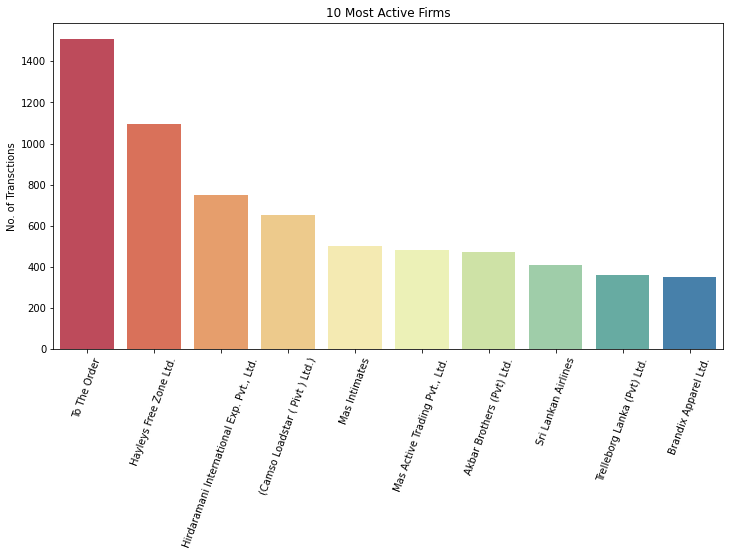

In [65]:
#Top 10 companies by number of transactions
top_10 = comm_trans_df['firm_name'].value_counts()[:10]


#plot for the top 10 countries
plt.figure(figsize=(12,6))
plt.xticks(rotation=70)
sns.barplot(x=top_10.index, y=top_10, palette = 'Spectral')
plt.ylabel("No. of Transctions")
plt.title("10 Most Active Firms")
plt.show()